In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:/Users/NAMAN/Downloads/Fraud.csv")

# Separating numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns

# Handling missing values for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])

# Handling missing values for non-numeric columns
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
data[non_numeric_cols] = non_numeric_imputer.fit_transform(data[non_numeric_cols])

# Assuming 'isFraud' is the target variable
X = data.drop('isFraud', axis=1)  # Replace 'isFraud' with the actual target column name
y = data['isFraud']  # Replace 'isFraud' with the actual target column name

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Number of trees: 10
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    314224
         1.0       0.97      0.80      0.87       349

    accuracy                           1.00    314573
   macro avg       0.98      0.90      0.94    314573
weighted avg       1.00      1.00      1.00    314573

ROC-AUC: 0.951125611886237

Number of trees: 50
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    314224
         1.0       0.96      0.80      0.88       349

    accuracy                           1.00    314573
   macro avg       0.98      0.90      0.94    314573
weighted avg       1.00      1.00      1.00    314573

ROC-AUC: 0.9738373313451059

Number of trees: 100
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    314224
         1.0       0.96      0.80      0.87       349

    accuracy                           1.00    314573
   macro a

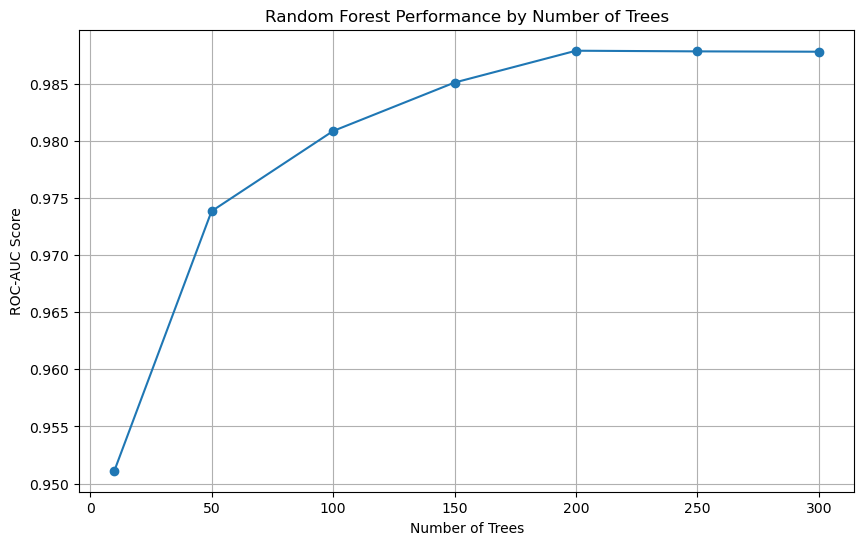

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:/Users/NAMAN/Downloads/Fraud.csv")

# Separating numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns

# Handling missing values for numeric columns
numeric_imputer = SimpleImputer(strategy='mean')
data[numeric_cols] = numeric_imputer.fit_transform(data[numeric_cols])

# Handling missing values for non-numeric columns
non_numeric_imputer = SimpleImputer(strategy='most_frequent')
data[non_numeric_cols] = non_numeric_imputer.fit_transform(data[non_numeric_cols])

# Encode non-numeric columns using Label Encoding
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Assuming 'isFraud' is the target variable
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Track performance metrics
n_estimators_list = [10, 50, 100, 150, 200, 250, 300]
roc_auc_scores = []

for n_estimators in n_estimators_list:
    # Train the random forest model
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC-AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    roc_auc_scores.append(roc_auc)
    
    # Output classification report
    print(f"Number of trees: {n_estimators}")
    print(classification_report(y_test, y_pred))
    print(f'ROC-AUC: {roc_auc}\n')

# Plot ROC-AUC scores vs. number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, roc_auc_scores, marker='o')
plt.title('Random Forest Performance by Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('ROC-AUC Score')
plt.grid(True)
plt.show()


In [4]:
# Optimal number of trees (you can choose based on the previous results)
optimal_n_estimators = n_estimators_list[np.argmax(roc_auc_scores)]

# Train the final model
final_model = RandomForestClassifier(n_estimators=optimal_n_estimators, random_state=42)
final_model.fit(X_train, y_train)

# Feature importance
importances = final_model.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values(by='importance', ascending=False)
print(feature_importance)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



          feature  importance
0            step    0.279268
4   oldbalanceOrg    0.174216
2          amount    0.163676
8  newbalanceDest    0.157474
7  oldbalanceDest    0.092432
1            type    0.035736
6        nameDest    0.035063
3        nameOrig    0.034691
5  newbalanceOrig    0.027443
9  isFlaggedFraud    0.000000
X_train shape: (734002, 10)
X_test shape: (314573, 10)
y_train shape: (734002,)
y_test shape: (314573,)


In [11]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   -------------------- ------------------- 41.0/81.9 kB 487.6 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 651.1 kB/s eta 0:00:00


          feature  importance
3        nameOrig    0.694182
6        nameDest    0.185280
0            step    0.047961
2          amount    0.027425
4   oldbalanceOrg    0.014281
8  newbalanceDest    0.012946
1            type    0.007467
5  newbalanceOrig    0.005817
7  oldbalanceDest    0.004642
9  isFlaggedFraud    0.000000
X_train shape: (734002, 10)
X_test shape: (314573, 10)
y_train shape: (734002,)
y_test shape: (314573,)
Confusion Matrix:
[[314224      0]
 [     0    349]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314224
           1       1.00      1.00      1.00       349

    accuracy                           1.00    314573
   macro avg       1.00      1.00      1.00    314573
weighted avg       1.00      1.00      1.00    314573


ROC AUC Score: 1.00


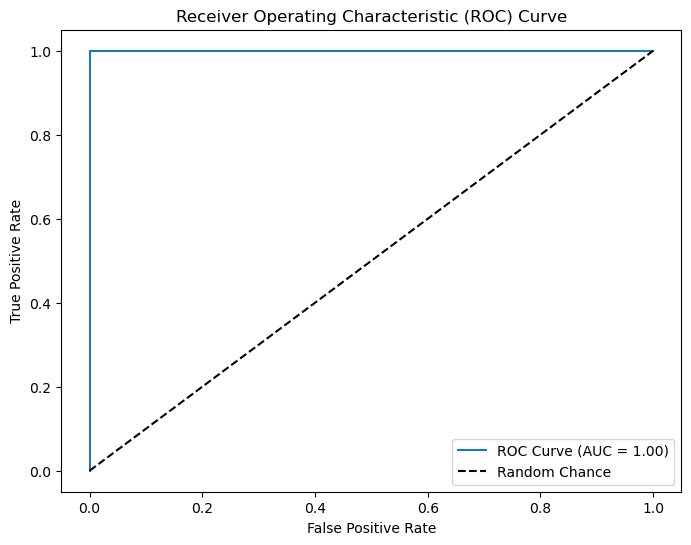

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import category_encoders as ce

# Load your dataset
data = pd.read_csv(r'C:\Users\NAMAN\Downloads\Fraud.csv')

# Prepare the data
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Use TargetEncoder for categorical variables
encoder = ce.TargetEncoder(cols=categorical_cols)
X_encoded = encoder.fit_transform(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Optimal number of trees (you can determine this based on cross-validation or previous evaluation)
optimal_n_estimators = 100  # Example value; replace with actual logic

# Train the final model
final_model = RandomForestClassifier(n_estimators=optimal_n_estimators, random_state=42)
final_model.fit(X_train, y_train)

# Feature importance
importances = final_model.feature_importances_
feature_importance = pd.DataFrame({'feature': X_encoded.columns, 'importance': importances}).sort_values(by='importance', ascending=False)
print(feature_importance)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Make predictions
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

# Model Performance Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
